In [34]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, precision_recall_curve

In [35]:
os.getcwd()

'/Users/moizali/Documents/Personal/MusicClassificationModel/02_model_developement'

In [36]:
df = pd.read_csv("Dim_Tracks_All.csv")

In [37]:
og_df = df.copy()

In [38]:
df.tail()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Name,Artist,category
37010,50OKS8aOeuiegMnJuPKUeN,0.742,0.855,1,-8.344,0,0.0611,0.0317,0.810000,0.1190,0.0455,138.008,420684,4,Apollo - Original Mix,Charlotte de Witte,Dance/Electronic
37011,0GVu2gXzurD0FBL7CHqE0F,0.708,0.670,1,-12.580,0,0.0416,0.2420,0.588000,0.3220,0.1240,89.992,298667,4,Santa Teresa,Oceanvs Orientalis,Dance/Electronic
37012,3AqJH0b0cFwLddG3uPqNSh,0.643,0.801,1,-9.771,1,0.4740,0.2620,0.880000,0.5600,0.1980,130.022,441567,3,Unfold,Charlie Thorstenson,Dance/Electronic
37013,3ddJUAVAo7b1AnNWi7jtZX,0.778,0.942,1,-4.239,1,0.1740,0.0111,0.177000,0.3420,0.8510,125.962,183113,4,Rise Again,Adelphi Music Factory,Dance/Electronic
37014,1x7NAvqHgCvhV549ls0FTE,0.806,0.741,1,-6.362,0,0.0471,0.0234,0.000037,0.0746,0.5630,119.971,176000,4,Sunset Lovers,Thierry Von Der Warth,Dance/Electronic


In [39]:
df.shape

(37015, 17)

In [76]:
df['category'].unique()

array(['Pop', 'R&B', 'Jazz', 'Rock', 'Soul', 'Indie', 'Metal', 'Sleep',
       'Country', 'Hip-Hop', 'Dance/Electronic'], dtype=object)

In [77]:
df["category"].value_counts()

Dance/Electronic    5263
Jazz                4907
Indie               4355
Pop                 3207
Rock                3119
Hip-Hop             3085
Sleep               2998
Soul                2879
R&B                 2547
Country             2430
Metal               2225
Name: category, dtype: int64

## Data Cleaning

In [42]:
df.columns

Index(['track_id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'Name', 'Artist',
       'category'],
      dtype='object')

In [43]:
# Drop columns that are not required for modelling
df.drop(["track_id","Name","Artist"], axis=1, inplace=True)

In [44]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'category'],
      dtype='object')

In [45]:
# Checking for NAs
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
category            0
dtype: int64

In [46]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,category
0,0.639,0.755,0,-5.661,1,0.0488,0.0658,0.000021,0.3300,0.506,87.062,287013,4,Pop
1,0.545,0.878,0,-4.078,1,0.0993,0.0299,0.000000,0.2810,0.590,97.505,160000,4,Pop
2,0.612,0.758,0,-4.123,1,0.0314,0.3090,0.000000,0.0949,0.579,128.015,245360,4,Pop
3,0.592,0.605,0,-6.159,0,0.0432,0.3420,0.000120,0.1030,0.419,81.980,204695,4,Pop
4,0.553,0.621,0,-7.356,1,0.0333,0.0428,0.596000,0.1150,0.190,120.051,272067,4,Pop


## EDA

In [47]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,37015.000000,37015.000000,37015.000000,37015.000000,37015.000000,37015.000000,37015.000000,37015.000000,37015.000000,37015.000000,37015.000000,3.701500e+04,37015.000000
mean,0.572310,0.607846,5.246684,-9.518418,0.608483,0.085471,0.304321,0.237768,0.185945,0.450462,118.974338,2.295068e+05,3.900959
std,0.183805,0.259219,3.570465,6.390715,0.488096,0.087092,0.332765,0.360976,0.157645,0.254977,29.088165,8.694756e+04,0.433785
min,0.000000,0.000020,0.000000,-48.770000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,3.260900e+04,0.000000
25%,0.459000,0.445000,2.000000,-10.985500,0.000000,0.036800,0.017300,0.000002,0.096200,0.240000,96.432000,1.761470e+05,4.000000
50%,0.593000,0.644000,5.000000,-7.726000,1.000000,0.050400,0.154000,0.001370,0.120000,0.442000,119.917000,2.126270e+05,4.000000
75%,0.707000,0.818000,8.000000,-5.566000,1.000000,0.090100,0.553000,0.524000,0.223000,0.650000,136.151500,2.619350e+05,4.000000
max,0.983000,1.000000,11.000000,1.836000,1.000000,0.944000,0.996000,1.000000,0.992000,0.985000,219.446000,2.594860e+06,5.000000


In [48]:
og_df[og_df['valence'] > 0.80]

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Name,Artist,category
5,29SZ02R7DwLxLeusrbgpCl,0.840,0.519,0,-8.617,1,0.0649,0.163000,0.0000,0.109,0.964,142.966,181574,4,Old Her,YDE,Pop
6,7MIhUdNJtaOnDmC5nBC1fb,0.687,0.818,0,-4.221,1,0.0778,0.011200,0.0000,0.248,0.886,125.952,165753,4,Deep Down (feat. Never Dull),Alok,Pop
12,0E7dgYApjRrO2WqlyoHKVy,0.762,0.852,0,-7.088,1,0.1150,0.055200,0.0000,0.128,0.851,98.562,208360,4,Got the Feelin' - Radio Edit,Five,Pop
13,2ykXJ9QVwx9Li8nsW0h6b2,0.812,0.712,0,-5.993,0,0.0452,0.010000,0.0000,0.108,0.850,98.029,148944,4,UP,INNA,Pop
17,1iOJQhxKSJ7dg3Dk03yPnl,0.709,0.891,0,-3.688,1,0.0528,0.001440,0.0000,0.034,0.886,141.040,214387,4,U + Ur Hand,P!nk,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36915,2JmbEZudT2eA3kUp5nXGZf,0.699,0.945,1,-0.942,1,0.3060,0.028900,0.0000,0.362,0.861,149.950,144000,4,Flat Line,Dodge & Fuski,Dance/Electronic
36916,2HUMN0kyvKMVWBiI1jIlvV,0.807,0.661,1,-9.345,0,0.0773,0.002110,0.9000,0.121,0.900,127.022,424235,4,Whisper,East End Dubs,Dance/Electronic
36930,6EEcPi3jwGYlG7BdMlnf42,0.801,0.958,1,-10.959,1,0.0526,0.000041,0.9430,0.110,0.874,130.478,490983,4,Typerope - Original Mix,Mathew Jonson,Dance/Electronic
36955,223OUizsa1t58lhDgBgwV0,0.970,0.523,1,-4.972,1,0.0455,0.340000,0.0328,0.048,0.924,128.425,212276,4,Every Night,Hannah Diamond,Dance/Electronic


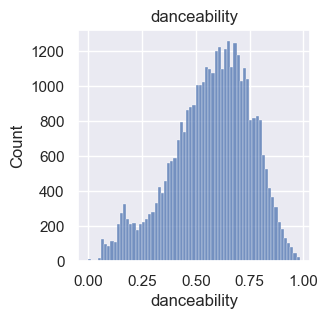

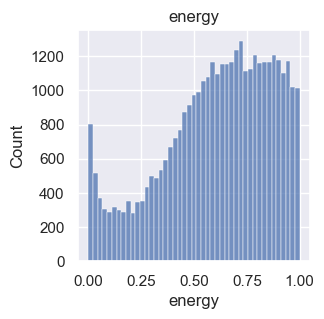

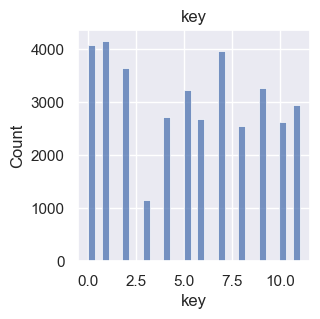

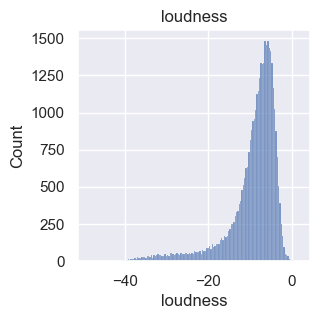

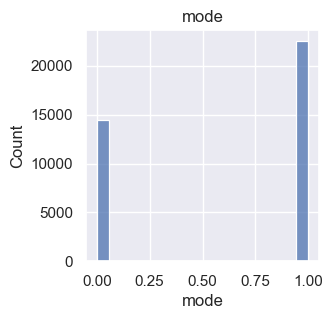

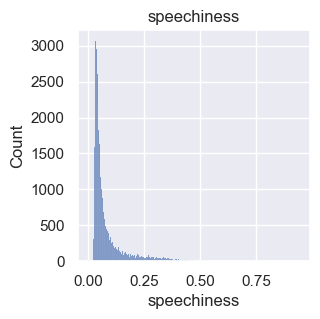

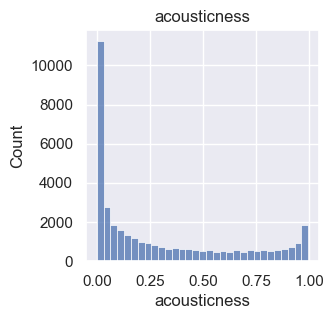

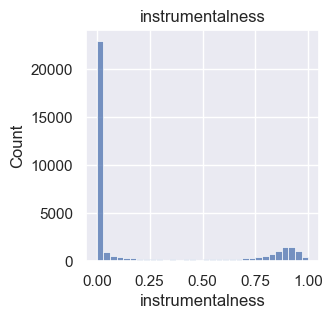

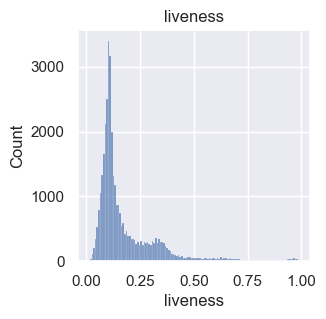

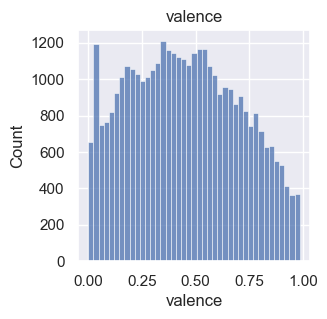

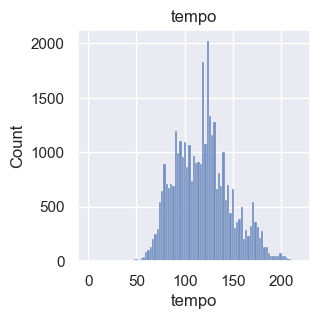

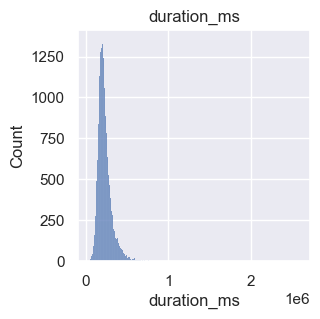

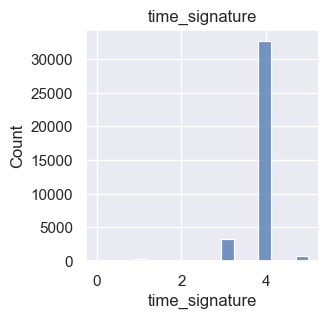

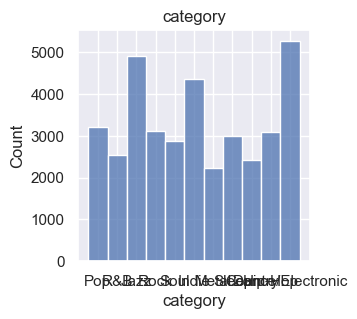

In [49]:
sns.set(rc={'figure.figsize':(3,3)})
for i in df.columns:
    plt.figure(i)
    ax = sns.histplot(df[i])
    ax.set_title(i)
    plt.show()

<AxesSubplot: >

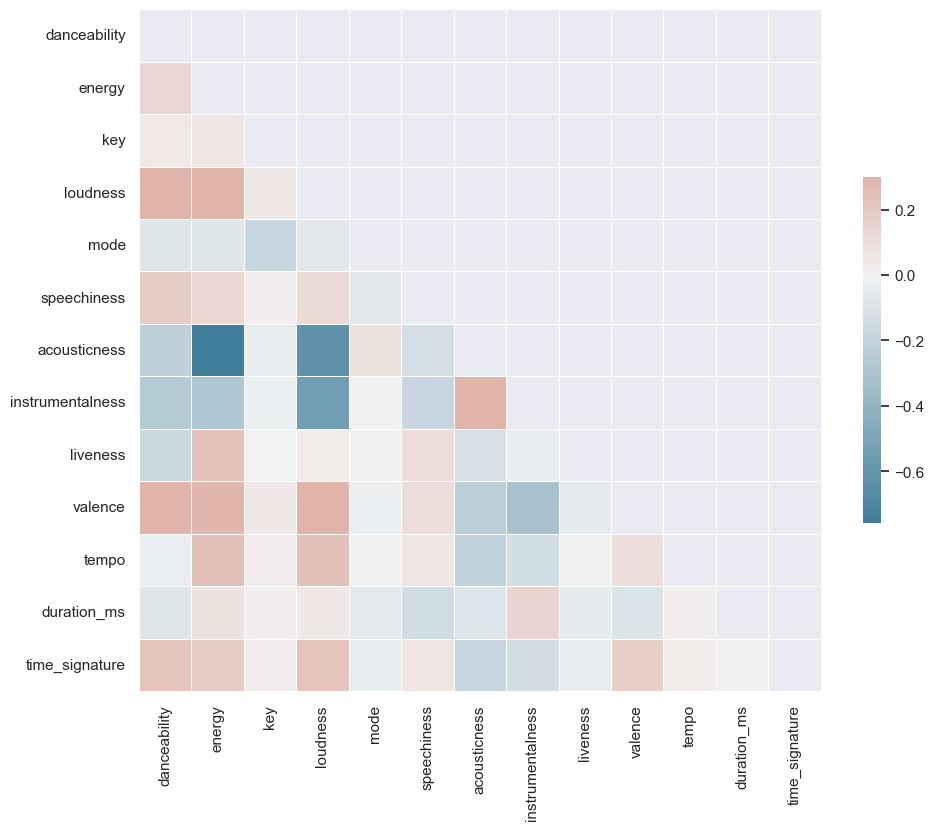

In [50]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### EDA by category

<AxesSubplot: xlabel='danceability', ylabel='Count'>

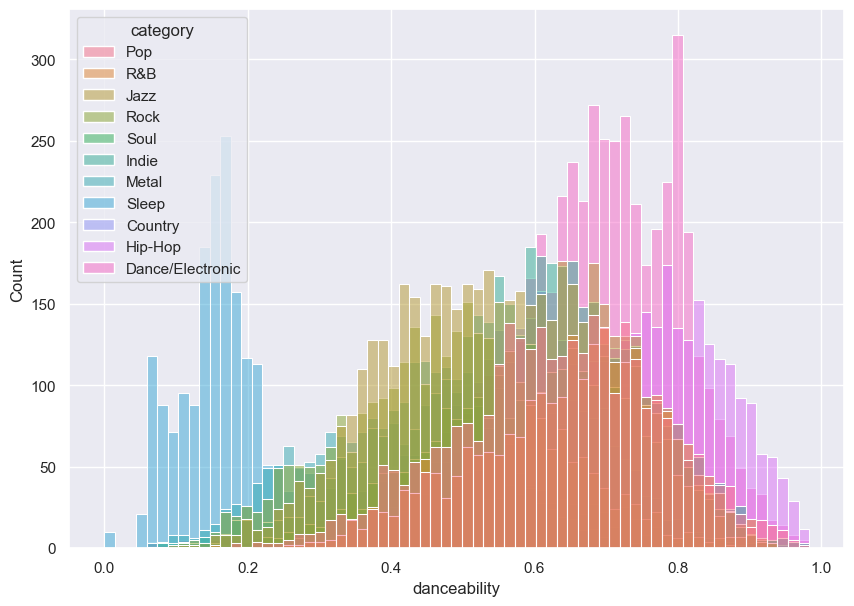

In [51]:
# Danceability by category
sns.set(rc={'figure.figsize':(10,7)})
sns.histplot(data=df, x="danceability", hue="category")

<AxesSubplot: xlabel='energy', ylabel='Count'>

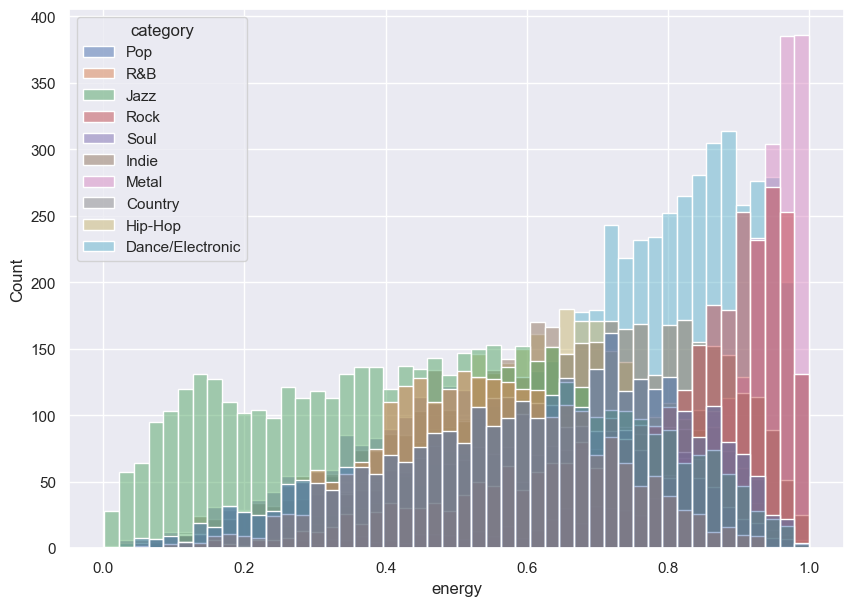

In [52]:
# Energy by category
sns.set(rc={'figure.figsize':(10,7)})
temp_df = df[df['category'] != 'Sleep']
sns.histplot(data=temp_df, x="energy", hue="category")

<AxesSubplot: xlabel='loudness', ylabel='Count'>

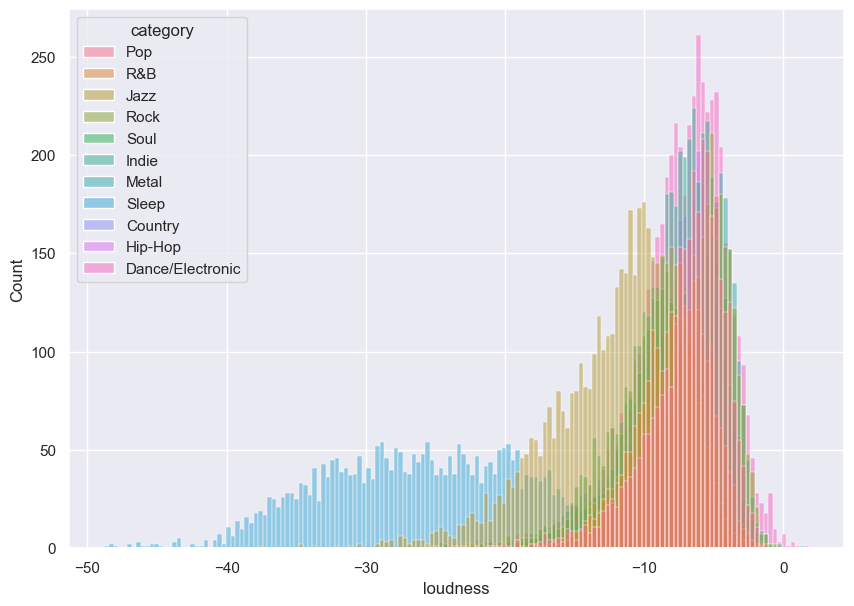

In [53]:
# Loudness by category
sns.set(rc={'figure.figsize':(10,7)})
# temp_df = df[df['category'] != 'Sleep']
sns.histplot(data=df, x="loudness", hue="category")

<AxesSubplot: xlabel='speechiness', ylabel='Count'>

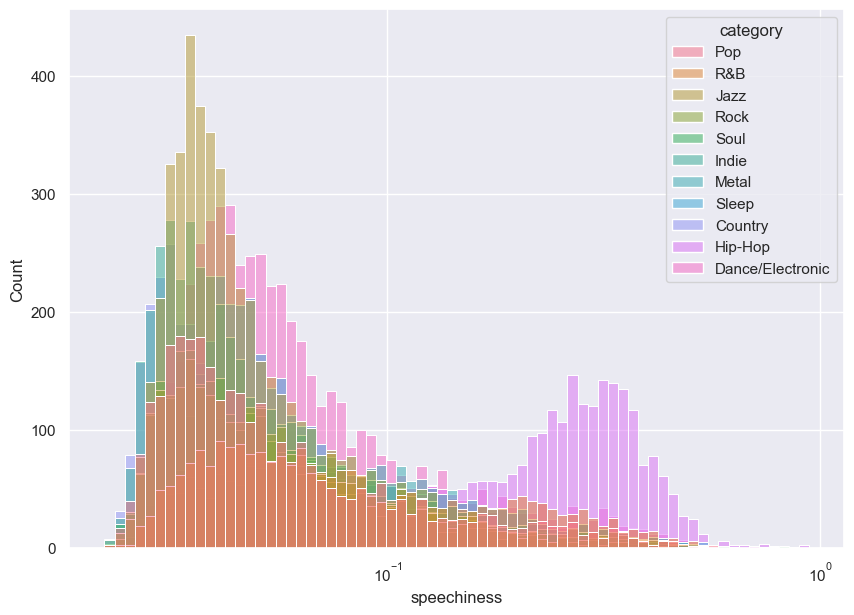

In [54]:
# Loudness by category
sns.set(rc={'figure.figsize':(10,7)})
temp_df = df[df['speechiness'] > 0]
sns.histplot(data=temp_df, x="speechiness", hue="category", log_scale=True)

Percentage of non zeros in df: 47.22% 


<AxesSubplot: xlabel='acousticness', ylabel='Count'>

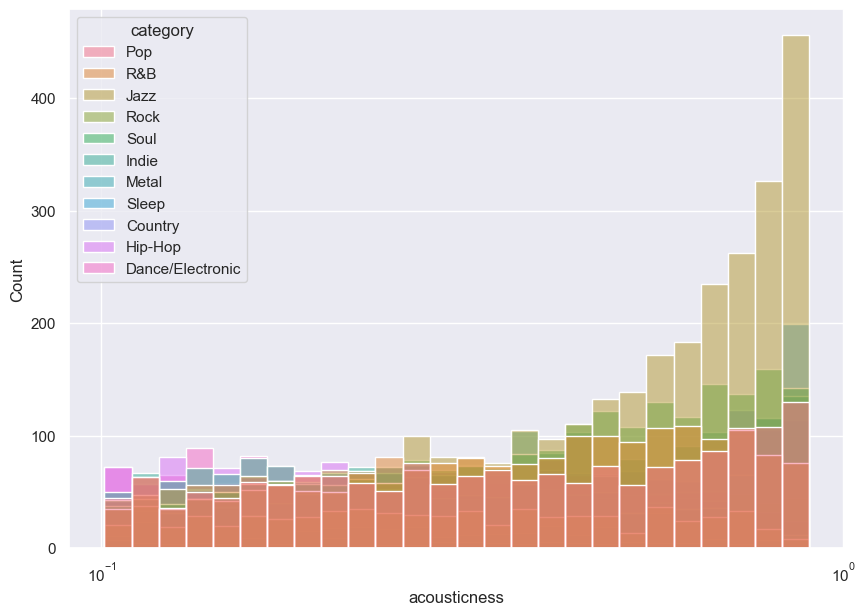

In [55]:
# Acousticness by category
sns.set(rc={'figure.figsize':(10,7)})
temp_df = df[(df['acousticness'] > 0.1) & (df['acousticness'] < 0.9)]
print(f"Percentage of non zeros in df: {temp_df.shape[0] / df.shape[0]:.2%} ")
sns.histplot(data=temp_df, x="acousticness", hue="category", log_scale=True)

Percentage of non zeros in df: 43.08% 


<AxesSubplot: xlabel='instrumentalness', ylabel='Count'>

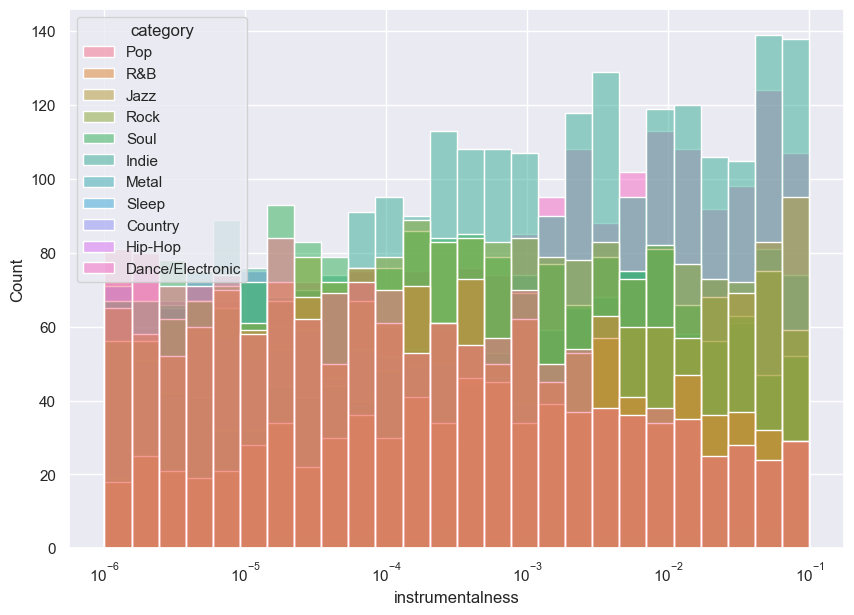

In [56]:
# Instrumentalness by category
sns.set(rc={'figure.figsize':(10,7)})
temp_df = df[(df['instrumentalness'] > 0) & (df['instrumentalness'] < 0.1)]
print(f"Percentage of non zeros in df: {temp_df.shape[0] / df.shape[0]:.2%} ")
sns.histplot(data=temp_df, x="instrumentalness", hue="category", log_scale=True)

<AxesSubplot: xlabel='valence', ylabel='Count'>

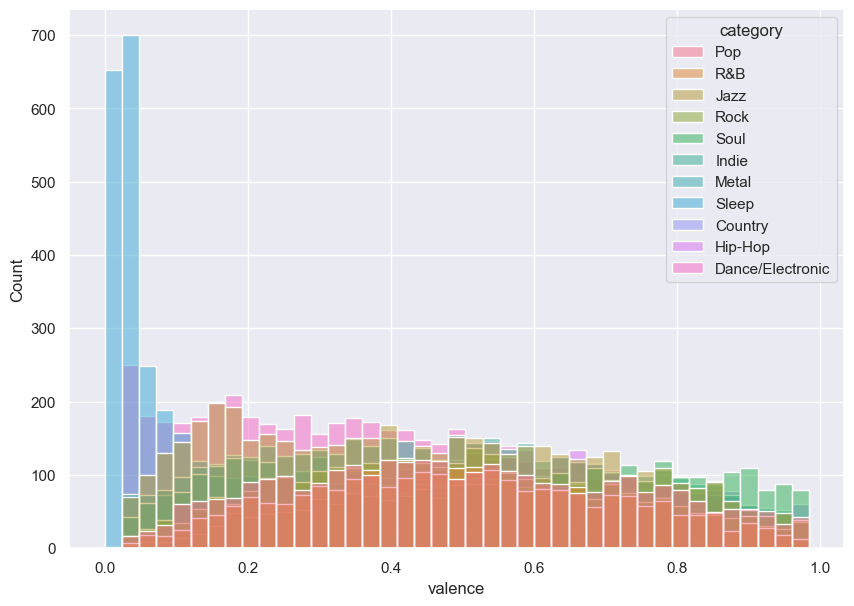

In [57]:
# Valence by category
sns.set(rc={'figure.figsize':(10,7)})
sns.histplot(data=df, x="valence", hue="category")

<AxesSubplot: xlabel='tempo', ylabel='Count'>

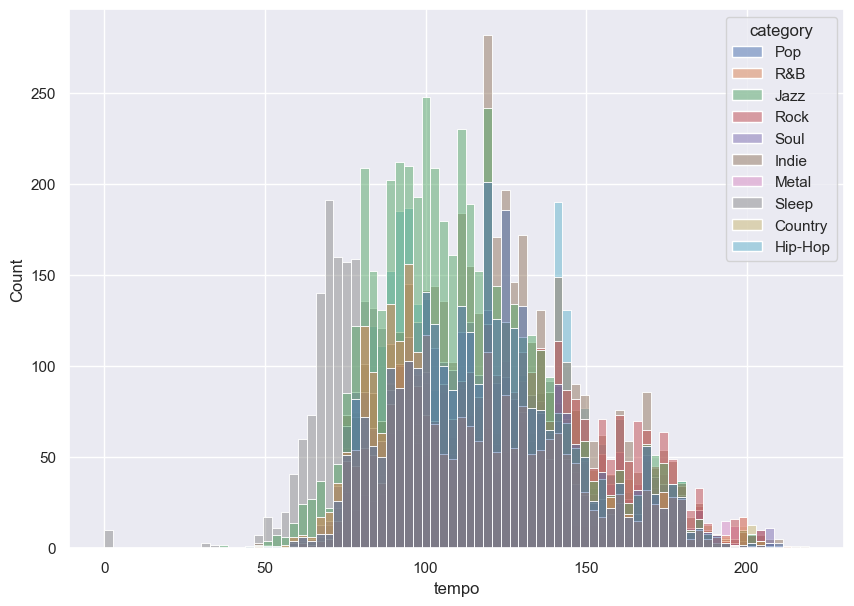

In [58]:
# Tempo by category
sns.set(rc={'figure.figsize':(10,7)})
temp_df = df[(df['category'] != 'Dance/Electronic')]
sns.histplot(data=temp_df, x="tempo", hue="category")

## Data Pre Processing

In [78]:
Target_Mapping = {'Hip-Hop':0, 'Pop':1, 'Country':2, 'Rock':3, 'R&B':4, 'Dance/Electronic':5,
       'Indie':6, 'Sleep':7, 'Jazz':8, 'Soul':9, 'Metal':10}
# Creating Target variable
df["Target"] = df["category"].map(Target_Mapping)

In [79]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'category', 'Target'],
      dtype='object')

In [61]:
Y = df["Target"]
X = df.drop(["category","Target"], axis=1)

In [62]:
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

## Data Modelling

### Decision Tree

In [63]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.4238822099148994

### Random Forest

In [65]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [66]:
print('Metrics for test data set: ')
accuracy_score(y_test, y_pred)

Metrics for test data set: 


0.5480210725381602

##### Hyperparameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8],
    'n_estimators': [100, 200]
}
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

print('Metrics for test data set: ')
accuracy_score(y_test, y_pred)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   3.0s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   2.9s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   3.0s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   3.0s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   2.9s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   5.8s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   6.1s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   

0.5508577603674186

ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of ticklabels (12).

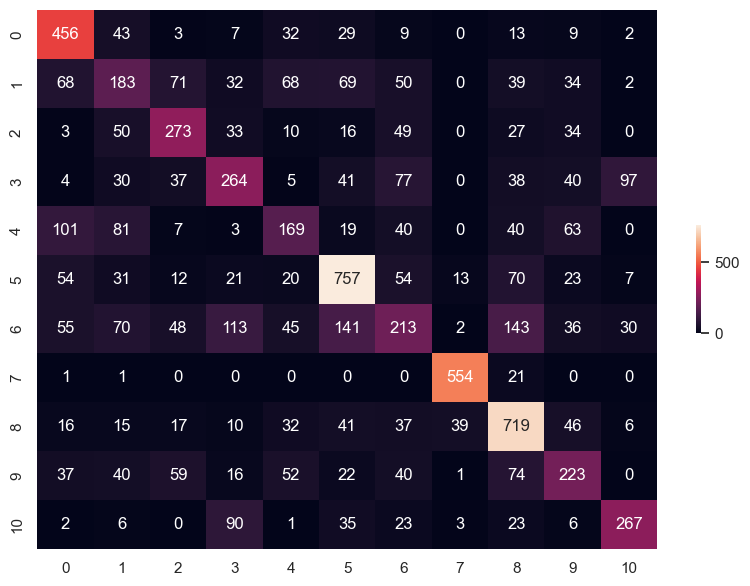

In [68]:
# Feature importance
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cbar_kws={"shrink": .2}, fmt='g')
ax.xaxis.set_ticklabels(Target_Mapping.keys())
ax.yaxis.set_ticklabels(Target_Mapping.keys())

In [ ]:
for i in range(len(list(Target_Mapping.keys()))):
    category = list(Target_Mapping.keys())[i]
    precision = precision_score(y_test, y_pred, average='macro', labels=[i])
    recall = recall_score(y_test, y_pred, average='macro', labels=[i])
    print(f"Category: {category}, Precision: {precision:.0%}, Recall: {recall:.0%}")

Category: Hip-Hop, Precision: 59%, Recall: 76%
Category: Pop, Precision: 35%, Recall: 26%
Category: Country, Precision: 47%, Recall: 52%
Category: Rock, Precision: 61%, Recall: 54%
Category: R&B, Precision: 38%, Recall: 32%
Category: Dance/Electronic, Precision: 65%, Recall: 73%
Category: Indie, Precision: 33%, Recall: 23%
Category: Sleep, Precision: 93%, Recall: 96%
Category: Jazz, Precision: 64%, Recall: 73%
Category: Soul, Precision: 40%, Recall: 42%


### XGBoost

In [69]:
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [70]:
y_pred = xgbmodel.predict(X_test)
accuracy_score(y_test, y_pred)

0.5511279211130623

#### HyperParameter Tuning

In [71]:
params_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [72]:
folds = 3
param_comb = 5

grid_search = GridSearchCV(estimator = xgbmodel, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[19:20:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[19:20:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[19:20:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[19:20:46] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[19:20:46] WARNING: /Users/runner/w

In [73]:
print(accuracy_score(y_test, y_pred))

0.5468053491827637


[Text(0, 0.5, 'Hip-Hop'),
 Text(0, 1.5, 'Pop'),
 Text(0, 2.5, 'Country'),
 Text(0, 3.5, 'Rock'),
 Text(0, 4.5, 'R&B'),
 Text(0, 5.5, 'Dance/Electronic'),
 Text(0, 6.5, 'Indie'),
 Text(0, 7.5, 'Sleep'),
 Text(0, 8.5, 'Jazz'),
 Text(0, 9.5, 'Soul'),
 Text(0, 10.5, 'Metal')]

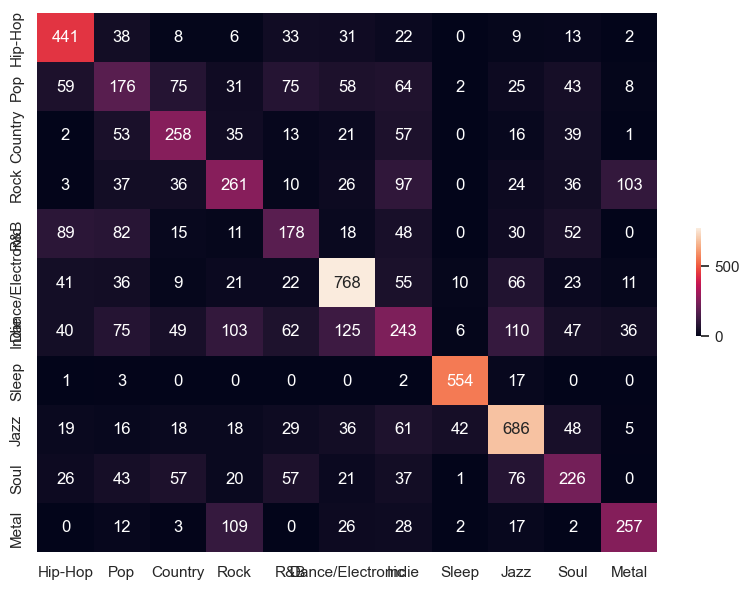

In [80]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cbar_kws={"shrink": .2}, fmt='g')
ax.xaxis.set_ticklabels(Target_Mapping.keys())
ax.yaxis.set_ticklabels(Target_Mapping.keys())

In [81]:
for i in range(len(list(Target_Mapping.keys()))):
    category = list(Target_Mapping.keys())[i]
    precision = precision_score(y_test, y_pred, average='macro', labels=[i])
    recall = recall_score(y_test, y_pred, average='macro', labels=[i])
    print(f"Category: {category}, Precision: {precision:.0%}, Recall: {recall:.0%}")

Category: Hip-Hop, Precision: 61%, Recall: 73%
Category: Pop, Precision: 31%, Recall: 29%
Category: Country, Precision: 49%, Recall: 52%
Category: Rock, Precision: 42%, Recall: 41%
Category: R&B, Precision: 37%, Recall: 34%
Category: Dance/Electronic, Precision: 68%, Recall: 72%
Category: Indie, Precision: 34%, Recall: 27%
Category: Sleep, Precision: 90%, Recall: 96%
Category: Jazz, Precision: 64%, Recall: 70%
Category: Soul, Precision: 43%, Recall: 40%
Category: Metal, Precision: 61%, Recall: 56%


## Saving Model

In [82]:
from sklearn.feature_extraction import DictVectorizer
import pickle
dv =  DictVectorizer(sparse=False)
train_dicts = X_train.reset_index(drop=True).to_dict(orient='records')

output_file = f'model_v1'
with open(output_file, 'wb') as f_out:
    pickle.dump((dv,best_clf), f_out)

In [50]:
features_new = {'danceability': 0.145, 'energy': 0.966, 'key': 6, 'loudness': -26.453, 'mode': 1, 'speechiness': 0.0521, 'acousticness': 0.116, 'instrumentalness': 0.824, 'liveness': 0.789, 'valence': 0.00635, 'tempo': 78.2, 'duration_ms': 152000, 'time_signature': 3}

Target_Mapping = {'Hip-Hop':0, 'Pop':1, 'Country':2, 'Rock':3, 'R&B':4, 'Dance/Electronic':5,
       'Indie':6, 'Sleep':7, 'Jazz':8, 'Soul':9}

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.145,0.966,6,-26.453,1,0.0521,0.116,0.824,0.789,0.00635,78.2,152000,3


In [59]:
X = dv.fit_transform([features_new])
print(X)
best_clf.predict_proba(pd.json_normalize(features_new))

[[ 1.1600e-01  1.4500e-01  1.5200e+05  9.6600e-01  8.2400e-01  6.0000e+00
   7.8900e-01 -2.6453e+01  1.0000e+00  5.2100e-02  7.8200e+01  3.0000e+00
   6.3500e-03]]


array([[1.0414781e-06, 5.5286534e-07, 3.4431929e-07, 5.9575618e-06,
        3.8747874e-07, 5.6201188e-06, 1.6703783e-06, 9.9997926e-01,
        4.2556762e-06, 9.5348628e-07]], dtype=float32)